In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [4]:
df = pd.read_csv("/kaggle/input/iris-dataset/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The **Iris** dataset is a classic dataset used in machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. The dataset consists of 150 samples of iris flowers from three different species, with each sample containing four features (attributes):

1. Sepal length (in cm)
2. Sepal width (in cm)
3. Petal length (in cm)
4. Petal width (in cm)

The three species of iris flowers in the dataset are:

1. Iris setosa
2. Iris versicolor
3. Iris virginica

Each sample in the dataset is labeled with one of these three species. Here is a brief description of each species:

- Iris setosa: Characterized by its small size, with relatively short sepals and petals.
- Iris versicolor: Characterized by its moderate size, with moderately-sized sepals and petals.
- Iris virginica: Characterized by its relatively large size, with long sepals and petals.

The Iris dataset is often used as a beginner's dataset for practicing classification algorithms and data visualization techniques. It is considered a good dataset for learning because it is small, easy to understand, and has clear class separation, making it suitable for various machine learning tasks such as classification, clustering, and dimensionality reduction.

Researchers and practitioners use the Iris dataset to demonstrate various machine learning algorithms, evaluate the performance of classification models, and explore data visualization techniques for data exploration and analysis.

Overall, the Iris dataset serves as a fundamental building block for understanding and practicing concepts in machine learning and data analysis.

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

1. `df`: This refers to a pandas DataFrame object. In pandas, a DataFrame is a two-dimensional labeled data structure with rows and columns, similar to a spreadsheet or SQL table. `df` is likely representing some dataset loaded into memory.

2. `.isna()`: This is a pandas DataFrame method that returns a DataFrame of boolean values, indicating whether each element in the original DataFrame is missing (`NaN`, stands for "Not a Number") or not. For each element in the DataFrame, `True` indicates a missing value, and `False` indicates a non-missing value.

3. `.sum()`: This is another pandas DataFrame method that computes the sum of values along a given axis. When used without any parameters, as in this case, it computes the sum of boolean `True` values, treating `True` as 1 and `False` as 0. Since `True` represents missing values, summing them up effectively counts the number of missing values in each column.

So, when you put it all together, `df.isna().sum()` computes the total number of missing values in each column of the DataFrame `df`. It returns a Series where the index represents the column names, and the values represent the number of missing values in each column. This can be useful for quickly identifying missing data in your dataset, which is an essential step in data preprocessing and cleaning before analysis or modeling.

# Visualization 

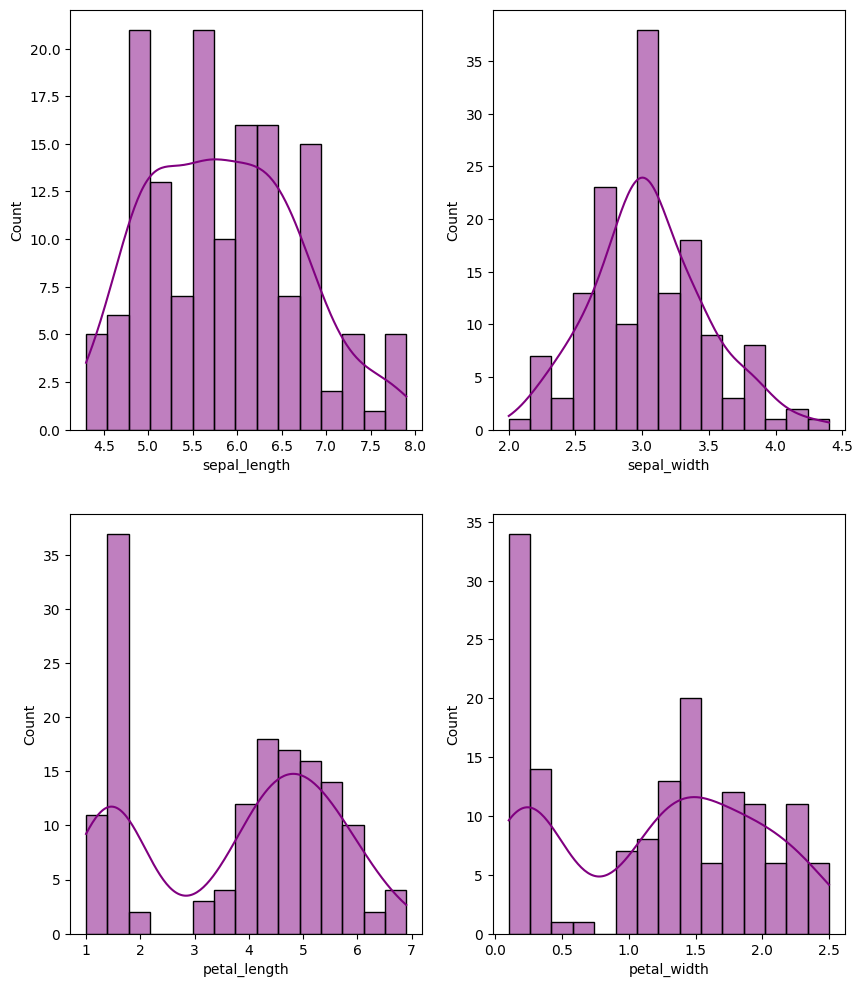

In [7]:
new_df = df.drop('species', axis=1)
plt.figure(figsize = (10, 12))
for i, col in enumerate(new_df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data = new_df, x = col, kde = True, bins = 15, color = 'purple')
plt.show()

This code generates a set of histograms for each numerical feature in `df`, after dropping the 'species' column. Here's a detailed explanation:

1. `new_df = df.drop('species', axis=1)`: This line creates a new DataFrame called `new_df` by dropping the column named 'species' from the original DataFrame `df`. The `axis=1` argument specifies that we are dropping a column (as opposed to dropping a row, which would be `axis=0`).

2. `plt.figure(figsize=(10, 12))`: This line creates a new figure object for plotting with a specific size of 10 inches in width and 12 inches in height.

3. `for i, col in enumerate(new_df.columns)`: This line iterates over each column in the `new_df` DataFrame, where `i` represents the index of the column, and `col` represents the column name.

4. `plt.subplot(2, 2, i+1)`: This line creates subplots within the figure. It specifies a grid of 2 rows and 2 columns of subplots and selects the i-th subplot to plot the histogram of the current column.

5. `sns.histplot(data=new_df, x=col, kde=True, bins=15, color='purple')`: This line uses seaborn's `histplot()` function to create a histogram for the current column (`col`) of the `new_df` DataFrame. It visualizes the distribution of the numerical data in that column. Parameters like `kde=True` add a kernel density estimate line to the plot, `bins=15` specifies the number of bins to use in the histogram, and `color='purple'` sets the color of the histogram bars to purple.

6. `plt.show()`: This line displays the plot containing all the histograms. It's important to call `plt.show()` to actually display the plot in Jupyter Notebook or any other Python environment.

Overall, this code snippet provides a quick and visual way to inspect the distributions of numerical features in a DataFrame, excluding the 'species' column, by plotting histograms for each feature.

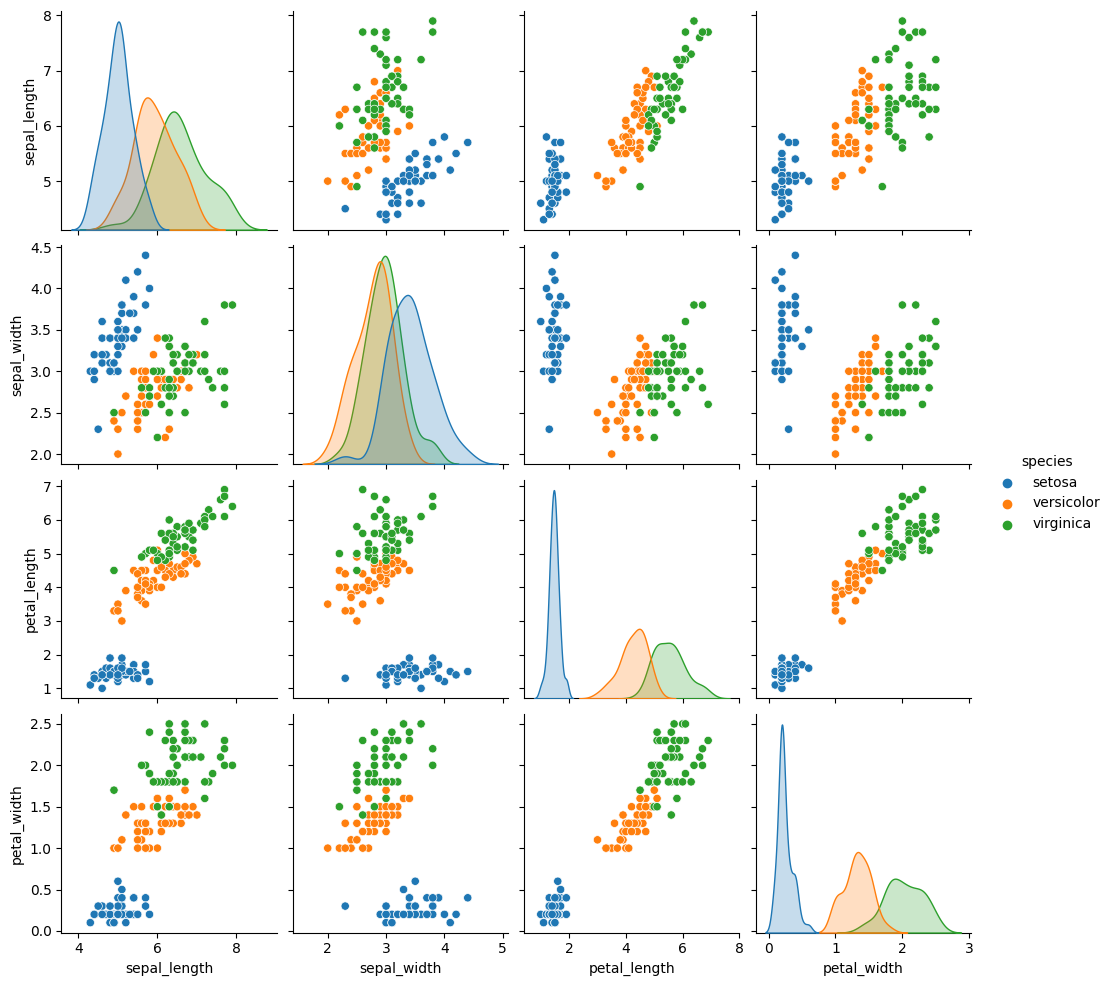

In [8]:
sns.pairplot(df, hue = "species")

This code snippet uses the seaborn library (`sns`) to create a pairplot based on the DataFrame.

```python
sns.pairplot(df, hue="species")
```

- `sns.pairplot`: This function is from the seaborn library, which is commonly used for statistical data visualization. `pairplot` creates a grid of pairwise plots showing the relationship between different pairs of variables in a DataFrame. It plots pairwise relationships in the dataset and also shows the distribution of each variable along the diagonal.

- `df`: This is the DataFrame containing the Iris dataset. The pairplot function will use this DataFrame to generate the plots.

- `hue="species"`: This parameter is used to color the data points based on the values in the "species" column of the DataFrame. It adds a visual distinction between the different species of iris flowers in the plots. Each species will be represented by a different color in the pairplot.

When you execute this code, seaborn will generate a grid of plots, where the rows and columns represent the different variables (features) in the DataFrame `df`. Each plot in the grid will show the relationship between two variables, and the points in the plot will be colored based on the species of iris flower to which they belong.

This pairplot is useful for visualizing the pairwise relationships between variables in the Iris dataset and can provide insights into how different features correlate with each other and how they can be used to distinguish between different species of iris flowers.

<Axes: >

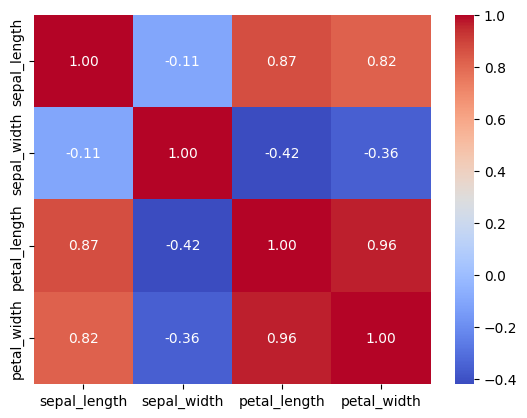

In [9]:
sns.heatmap(df.drop("species", axis=1).corr(),cmap='coolwarm',fmt=".2f",annot=True)

This code snippet is using the Seaborn library (`sns`) in Python to create a heatmap visualization based on the correlation matrix of the DataFrame.

1. `df.drop("species", axis=1)`: This part of the code drops the column named "species" from the DataFrame `df`. The `drop()` function in pandas is used to remove rows or columns from a DataFrame. The `axis=1` argument indicates that we are dropping a column.

2. `.corr()`: After dropping the "species" column, the `.corr()` method computes the pairwise correlation of columns in the DataFrame. This generates a correlation matrix where each cell represents the correlation coefficient between two variables.

3. `sns.heatmap(...)`: This part of the code creates a heatmap using the Seaborn library. The `heatmap()` function is used to visualize the correlation matrix as a heatmap.

   - `df.drop("species", axis=1).corr()`: This is the correlation matrix that serves as the input data for the heatmap.
   
   - `cmap='coolwarm'`: This argument specifies the color map to be used for the heatmap. Here, 'coolwarm' is chosen, which is a diverging colormap ranging from cool (blue) to warm (red).
   
   - `fmt=".2f"`: This argument specifies the format of the annotation text in each cell of the heatmap. Here, it is set to ".2f" to format the numbers with two decimal places.
   
   - `annot=True`: This argument specifies whether to annotate each cell of the heatmap with the numeric value. Setting it to `True` enables annotations, where each cell displays the correlation coefficient.

Overall, this code generates a heatmap visualization of the correlation matrix of the numerical features in the DataFrame `df`, excluding the "species" column. It helps visualize the relationships and strength of correlation between different pairs of features in the dataset.

# Feature Selection

In [10]:
X = df.drop("species", axis = 1)
y = df['species']

This code snippet splits the DataFrame `df` into features (`X`) and target labels (`y`). 

- `X` contains all the columns of `df` except the column named "species". It drops the "species" column along the specified axis (axis=1 indicates columns).
- `y` contains only the "species" column from `df`, which serves as the target variable for a machine learning task.

In [11]:
X.shape, y.shape

((150, 4), (150,))

# Data Splitting:

Train-test split is a crucial step in machine learning model development. It involves dividing a dataset into two subsets: a training set used to train the model, and a testing set to evaluate its performance. This ensures an unbiased assessment of the model's generalization capabilities and helps prevent overfitting to the training data.

The dataset underwent division into training and testing sets, allocating 70% for training and
30% for testing.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

# Model Building

## Gaussian Naive Bayes:

Gaussian Naive Bayes (GNB) is a variant of the Naive Bayes algorithm, a probabilistic classification method based on Bayes' theorem with the "naive" assumption of independence among features. Here's a detailed explanation of Gaussian Naive Bayes:


1. **Assumption of Independence:**
   - GNB assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. In other words, all features are assumed to be independent of each other given the class label.

2. **Gaussian Distribution:**
   - GNB specifically assumes that continuous features follow a Gaussian (normal) distribution. This means that it models each class's likelihood as a Gaussian distribution over the values of the features.

3. **Parameter Estimation:**
   - To build a Gaussian Naive Bayes model, you estimate two sets of parameters:
     - **Mean (μ)** and **Variance (σ²)** for each feature in each class.
     - Given a class label, GNB computes the mean and variance of each feature's values observed in the training data for that class.

4. **Predictive Probability Calculation:**
   - To make predictions, GNB calculates the posterior probability of each class given the features using Bayes' theorem:
     \[ P(C_k | x) = \frac{P(x | C_k) \cdot P(C_k)}{P(x)} \]
   - Since the denominator \(P(x)\) is constant for all classes, it can be ignored, and the class with the highest posterior probability is predicted.

5. **Decision Rule:**
   - GNB employs a decision rule known as the Maximum A Posteriori (MAP) rule, where it selects the class that has the highest posterior probability given the observed features.

### When to Use Gaussian Naive Bayes:

- **Small to Medium-sized Datasets:** GNB is particularly suitable for datasets with a small to medium number of features. It can perform well even with a relatively small amount of training data.
  
- **Independence Assumption Holds:** GNB works best when the features are conditionally independent given the class label. If this assumption is valid, GNB can provide competitive classification performance.

- **Continuous Features with Gaussian Distribution:** GNB assumes that continuous features follow a Gaussian distribution. It's suitable for datasets where this assumption holds true or can be approximately assumed.

- **Text Classification:** GNB is commonly used in text classification tasks, such as spam detection or document categorization, where the independence assumption can hold reasonably well for bag-of-words features.

- **Baseline Model:** GNB can serve as a quick and simple baseline model for classification tasks. It's fast to train and doesn't require much tuning.

However, it's essential to keep in mind that GNB's performance may degrade if the independence assumption is violated or if features have heavy-tailed distributions that deviate significantly from Gaussian. Additionally, it may not perform well on highly correlated features.

In [13]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

The provided code snippet involves using the Gaussian Naive Bayes classifier (`GaussianNB`) from the scikit-learn library in Python for training a machine learning model.


1. `gnb = GaussianNB()`: This line initializes an instance of the Gaussian Naive Bayes classifier. `GaussianNB` is a class provided by scikit-learn for Gaussian Naive Bayes classification, which assumes that the features follow a Gaussian (normal) distribution. This classifier is appropriate when dealing with continuous features.

2. `gnb.fit(x_train, y_train)`: This line trains (fits) the Gaussian Naive Bayes classifier on the training data. It takes two main arguments:
   - `x_train`: This is the training data, typically represented as a 2D array or DataFrame, where each row corresponds to an instance/sample and each column corresponds to a feature.
   - `y_train`: This is the target labels corresponding to the training data. It's a 1D array or list containing the true class labels for each instance/sample in the training data.
   
   When `fit()` is called, the Gaussian Naive Bayes classifier learns the parameters of the Gaussian distribution (mean and variance) for each feature in each class using the provided training data (`x_train`) and corresponding labels (`y_train`). These learned parameters are then used during prediction to calculate the likelihood of observing a particular feature value given the class.

After this code executes, `gnb` will be a trained Gaussian Naive Bayes classifier that has learned from the provided training data. You can then use this trained classifier to make predictions on new unseen data using the `predict()` method.

In [14]:
gnb_pred = gnb.predict(x_test)
gnb_pred

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor'], dtype='<U10')

In [15]:
score1 = accuracy_score(gnb_pred, y_test)
score1

0.9111111111111111

The provided code calculates the accuracy score of a model's predictions (`gnb_pred`) compared to the true labels (`y_test`). Here's a breakdown of what each line does:

1. `score1 = accuracy_score(gnb_pred, y_test)`: This line calculates the accuracy score by comparing the predicted labels (`gnb_pred`) to the true labels (`y_test`). The `accuracy_score` function, which likely comes from a library like scikit-learn, computes the accuracy of the classification model by comparing the predicted labels to the actual labels and then returning the fraction of correct predictions. The result is stored in the variable `score1`.

2. `score1`: This line simply prints out the value stored in the variable `score1`, which represents the accuracy score of the model's predictions. In this case, the value `0.9111111111111111` is printed, indicating an accuracy of approximately 91.11% for the model's predictions compared to the true labels.

In [16]:
print(classification_report(gnb_pred ,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.82      0.87        17
   virginica       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



The code provided is output from the `classification_report` function, which is commonly used to evaluate the performance of a classification model. Let's break down the output:

1. **Precision:** Precision is the ratio of true positive predictions to the total number of positive predictions. It measures the accuracy of positive predictions. In this output:
   - For the class "setosa," the precision is 1.00, indicating that all instances classified as "setosa" were correctly classified.
   - For the class "versicolor," the precision is 0.93, indicating that 93% of instances classified as "versicolor" were correctly classified.
   - For the class "virginica," the precision is 0.80, indicating that 80% of instances classified as "virginica" were correctly classified.

2. **Recall:** Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances. It measures the ability of the classifier to find all the positive instances. In this output:
   - For the class "setosa," the recall is 1.00, indicating that all actual instances of "setosa" were correctly classified.
   - For the class "versicolor," the recall is 0.82, indicating that 82% of actual instances of "versicolor" were correctly classified.
   - For the class "virginica," the recall is 0.92, indicating that 92% of actual instances of "virginica" were correctly classified.

3. **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this output:
   - For the class "setosa," the F1-score is 1.00.
   - For the class "versicolor," the F1-score is 0.87.
   - For the class "virginica," the F1-score is 0.86.

4. **Support:** Support is the number of actual occurrences of each class in the test dataset.

5. **Accuracy:** Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. In this output, the overall accuracy is 0.91, indicating that the model correctly predicted 91% of the instances in the test dataset.

6. **Macro Avg:** Macro average is the average of precision, recall, and F1-score across all classes, without considering class imbalance.

7. **Weighted Avg:** Weighted average is the weighted average of precision, recall, and F1-score across all classes, where each class's score is weighted by its support.

Overall, the `classification_report` provides a comprehensive summary of the classification model's performance across multiple metrics and classes, helping to assess its effectiveness and identify areas for improvement.

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, gnb_pred)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 12]])

The provided code computes and displays a confusion matrix. Here's an explanation:

1. **Confusion Matrix (cm):**
   - A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
   - It allows visualization of the performance of an algorithm by displaying the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model.

2. **Computing the Confusion Matrix:**
   - The code snippet computes the confusion matrix using the `confusion_matrix()` function, provided by scikit-learn (`sklearn.metrics` module).
   - It takes two arguments:
     - `y_test`: The true labels of the test data.
     - `gnb_pred`: The predicted labels generated by some classifier (`gnb_pred` might stand for predictions made by a Gaussian Naive Bayes classifier, but it depends on the context).
   - The function compares the true labels (`y_test`) with the predicted labels (`gnb_pred`) and generates a confusion matrix based on the counts of each combination of true and predicted labels.

3. **Displaying the Confusion Matrix:**
   - After computing the confusion matrix, the code displays it by evaluating the variable `cm` in a Jupyter Notebook or similar environment.
   - The confusion matrix is displayed as a table with rows and columns corresponding to the true and predicted labels, respectively.
   - Each cell in the table represents the count of instances where a true label (row) was predicted as a specific class (column).
   - In the provided example, the confusion matrix is displayed as a NumPy array:

```
array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 12]])
```

   - This confusion matrix indicates that:
     - 15 instances of class 0 were correctly classified as class 0 (true negatives).
     - 14 instances of class 1 were correctly classified as class 1 (true positives).
     - 12 instances of class 2 were correctly classified as class 2 (true positives).
     - 1 instance of class 1 was incorrectly classified as class 2 (false negative).
     - 3 instances of class 2 were incorrectly classified as class 1 (false positive).

   - The diagonal elements of the matrix represent the correctly classified instances, while off-diagonal elements represent misclassifications.

Understanding the confusion matrix is crucial for evaluating the performance of a classification model and identifying areas where the model may need improvement.

<Axes: >

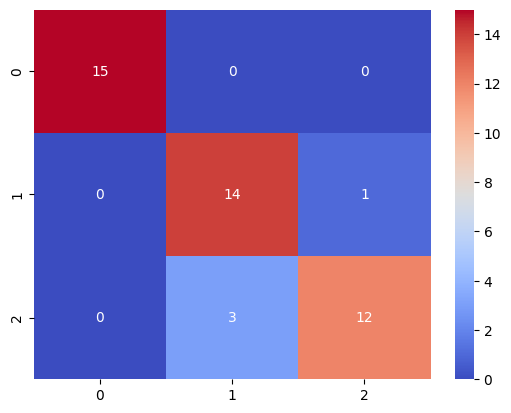

In [18]:
sns.heatmap(cm, annot=True, cmap = "coolwarm")

## Categorical Naive Bayes 

Categorical Naive Bayes is a variant of the Naive Bayes classifier that is specifically designed to handle categorical features. It's particularly useful when dealing with datasets where the features are categorical rather than continuous.

Here's how it works:

1. **Assumption of Independence**: Like other Naive Bayes classifiers, the Categorical Naive Bayes assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. This is known as the "naive" assumption and makes the algorithm computationally efficient, especially when dealing with high-dimensional data.

2. **Probability Calculation**: Categorical Naive Bayes calculates the probability of each class given a set of features using Bayes' theorem. It computes the probability of each class based on the presence of each categorical feature and the prior probability of each class.

3. **Categorical Features Handling**: Unlike Gaussian Naive Bayes, which assumes features follow a Gaussian (normal) distribution, Categorical Naive Bayes handles categorical features directly. It calculates the likelihood of each class given the categorical feature values using the frequency of occurrence of each category in the training data.

When to use Categorical Naive Bayes:

1. **Categorical Data**: When your dataset consists primarily of categorical features rather than continuous ones, Categorical Naive Bayes is a suitable choice. It handles categorical data more efficiently and effectively than other variants of Naive Bayes.

2. **Text Classification**: Categorical Naive Bayes is commonly used in text classification tasks where features represent the presence or absence of specific words or tokens in documents. Each feature corresponds to a word or token, and its value indicates whether it appears in the document.

3. **Spam Filtering**: In email spam filtering, where features might include the presence or absence of certain keywords or phrases, Categorical Naive Bayes can be effective. It can classify emails as spam or non-spam based on the occurrence of specific words or patterns.

4. **Multi-Class Classification**: Categorical Naive Bayes can handle multi-class classification problems where there are more than two classes. It calculates the probability of each class given the categorical feature values and assigns the class with the highest probability to each instance.

Overall, Categorical Naive Bayes is a useful algorithm for classification tasks involving categorical data, especially in domains such as text analysis, spam detection, and multi-class classification. However, it's essential to keep in mind its assumption of feature independence, which may not always hold true in real-world datasets.

In [19]:
cnb = CategoricalNB()
cnb.fit(x_train, y_train)

CategoricalNB()

In [20]:
cnb_pred = cnb.predict(x_test)
score2 = accuracy_score(cnb_pred, y_test)
score2

0.9111111111111111

In [21]:
print(classification_report(cnb_pred ,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.82      0.87        17
   virginica       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



In [22]:
cm = confusion_matrix(y_test, cnb_pred)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 12]])

<Axes: >

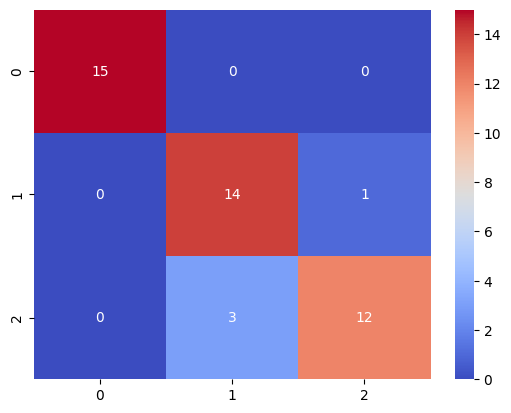

In [23]:
sns.heatmap(cm, annot=True, cmap = "coolwarm")

## Multinomial Naive Bayes (MNB)

Multinomial Naive Bayes (MNB) is a variant of the Naive Bayes algorithm, which is commonly used for classification tasks, especially in natural language processing (NLP) and text classification. Here's a detailed explanation of Multinomial Naive Bayes:

### Explanation:

1. **Multinomial Naive Bayes:**
   - Multinomial Naive Bayes is specifically designed for features that represent counts or frequencies of events, making it suitable for text classification tasks where features are typically word counts or TF-IDF (Term Frequency-Inverse Document Frequency) values.
   - It models the likelihood of observing a particular word or feature given a class, using a multinomial distribution.
   - In text classification, each document is represented as a vector of word counts or TF-IDF values, and MNB estimates the probability of each class given the observed word counts or TF-IDF values.

3. **Mathematical Formulation:**
   - In the context of text classification, let's denote:
     - \(D\) as the document.
     - \(w_1, w_2, ..., w_n\) as the words in the document.
     - \(c\) as the class label.
   - The probability of a document \(D\) belonging to class \(c\) is calculated using Bayes' theorem as:
     \[
     P(c|D) = \frac{P(c) \times P(D|c)}{P(D)}
     \]
   - Since \(P(D)\) is constant for all classes, we can ignore it for classification purposes.
   - \(P(c)\) is the prior probability of class \(c\).
   - \(P(D|c)\) is the likelihood of observing document \(D\) given class \(c\). In MNB, it's calculated as the product of probabilities of observing each word in \(D\) given class \(c\).

4. **When to Use Multinomial Naive Bayes:**
   - MNB is particularly suitable for text classification tasks, such as email spam detection, sentiment analysis, document classification, and topic classification.
   - It works well with high-dimensional data (e.g., word counts or TF-IDF vectors) and is computationally efficient.
   - MNB assumes that features are conditionally independent given the class, which might not hold true in all cases, especially for tasks where feature dependencies are important. However, in practice, MNB often performs well despite this simplifying assumption.

### Conclusion:
Multinomial Naive Bayes is a simple yet effective algorithm for text classification tasks, especially when dealing with high-dimensional data such as word counts or TF-IDF vectors. It's widely used in various applications and serves as a baseline model for text classification tasks.

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [25]:
mnb_pred = mnb.predict(x_test)
score3 = accuracy_score(mnb_pred, y_test)
score3

0.9777777777777777

In [26]:
print(classification_report(mnb_pred ,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        16
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [27]:
cm = confusion_matrix(y_test, mnb_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

<Axes: >

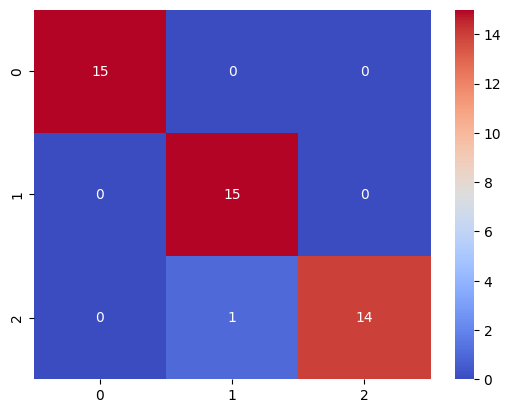

In [28]:
sns.heatmap(cm, annot=True, cmap = "coolwarm")

The provided accuracy scores suggest that the Multinomial Naive Bayes (MNB) model outperforms both Gaussian Naive Bayes (GNB) and Categorical Naive Bayes (CNB) models on the Iris dataset. Here's a comparison and explanation of the difference:

1. **Multinomial Naive Bayes (MNB) (Accuracy: 0.97777)**:
   - MNB assumes that features represent counts or frequencies, making it suitable for datasets with discrete features like word counts or TF-IDF values.
   - The high accuracy score of 0.97777 suggests that the MNB model was able to effectively learn from the Iris dataset, likely because it handles features representing petal and sepal measurements well.
   - However, it's worth noting that MNB might not be the most appropriate choice for the Iris dataset, as its features are continuous rather than discrete. The high accuracy could be due to the simplicity of the dataset and the robustness of the MNB algorithm.

2. **Gaussian Naive Bayes (GNB) (Accuracy: 0.911111)**:
   - GNB assumes that features follow a Gaussian (normal) distribution, which means it's suitable for datasets with continuous features.
   - The slightly lower accuracy score of 0.911111 compared to MNB suggests that the GNB model may not have captured the relationships between features as effectively. This could be because GNB assumes that features are independent and normally distributed, which might not hold true for the Iris dataset.

3. **Categorical Naive Bayes (CNB) (Accuracy: 0.911111)**:
   - CNB is specifically designed for datasets with categorical features, where each feature represents a category or discrete value.
   - The accuracy score of 0.911111 is identical to GNB, indicating that both models perform similarly on the Iris dataset.
   - While the Iris dataset features are not strictly categorical, CNB might still perform reasonably well due to its robustness to feature types, but it might not fully leverage the continuous nature of the data.

In summary, the MNB model achieved the highest accuracy on the Iris dataset, likely because it handled the features representing petal and sepal measurements effectively. GNB and CNB performed similarly but slightly lower than MNB, suggesting that the assumption of feature distributions in GNB and the strict categorical assumption in CNB might not be perfectly aligned with the characteristics of the Iris dataset.